In [8]:
# prompt: !pip install scikit-learn==1.5.0 tensorflow==2.14.0 numpy==1.26.0 pandas==2.2.2 matplotlib==3.9.0 seaborn==0.13.2

# !pip install scikit-learn==1.5.0 tensorflow==2.14.0 numpy==1.26.0 pandas==2.2.2 matplotlib==3.9.0 seaborn==0.13.2


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv.gz')
# df to struktura dataframe przypominajaca tabele

df.head() # pierwsze 5 wuerszy
df.info() # informacje o typach kolumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
pd.value_counts(df['ocean_proximity']) # podaje szczegoly kolumny ocean_proximity
# ile razy wystepouje dana wartosc

<ipython-input-10-4c3b34d04c9e>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['ocean_proximity']) # podaje szczegoly kolumny ocean_proximity


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df['ocean_proximity'].describe() # podaje szczeogoly wartosci kolumny

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

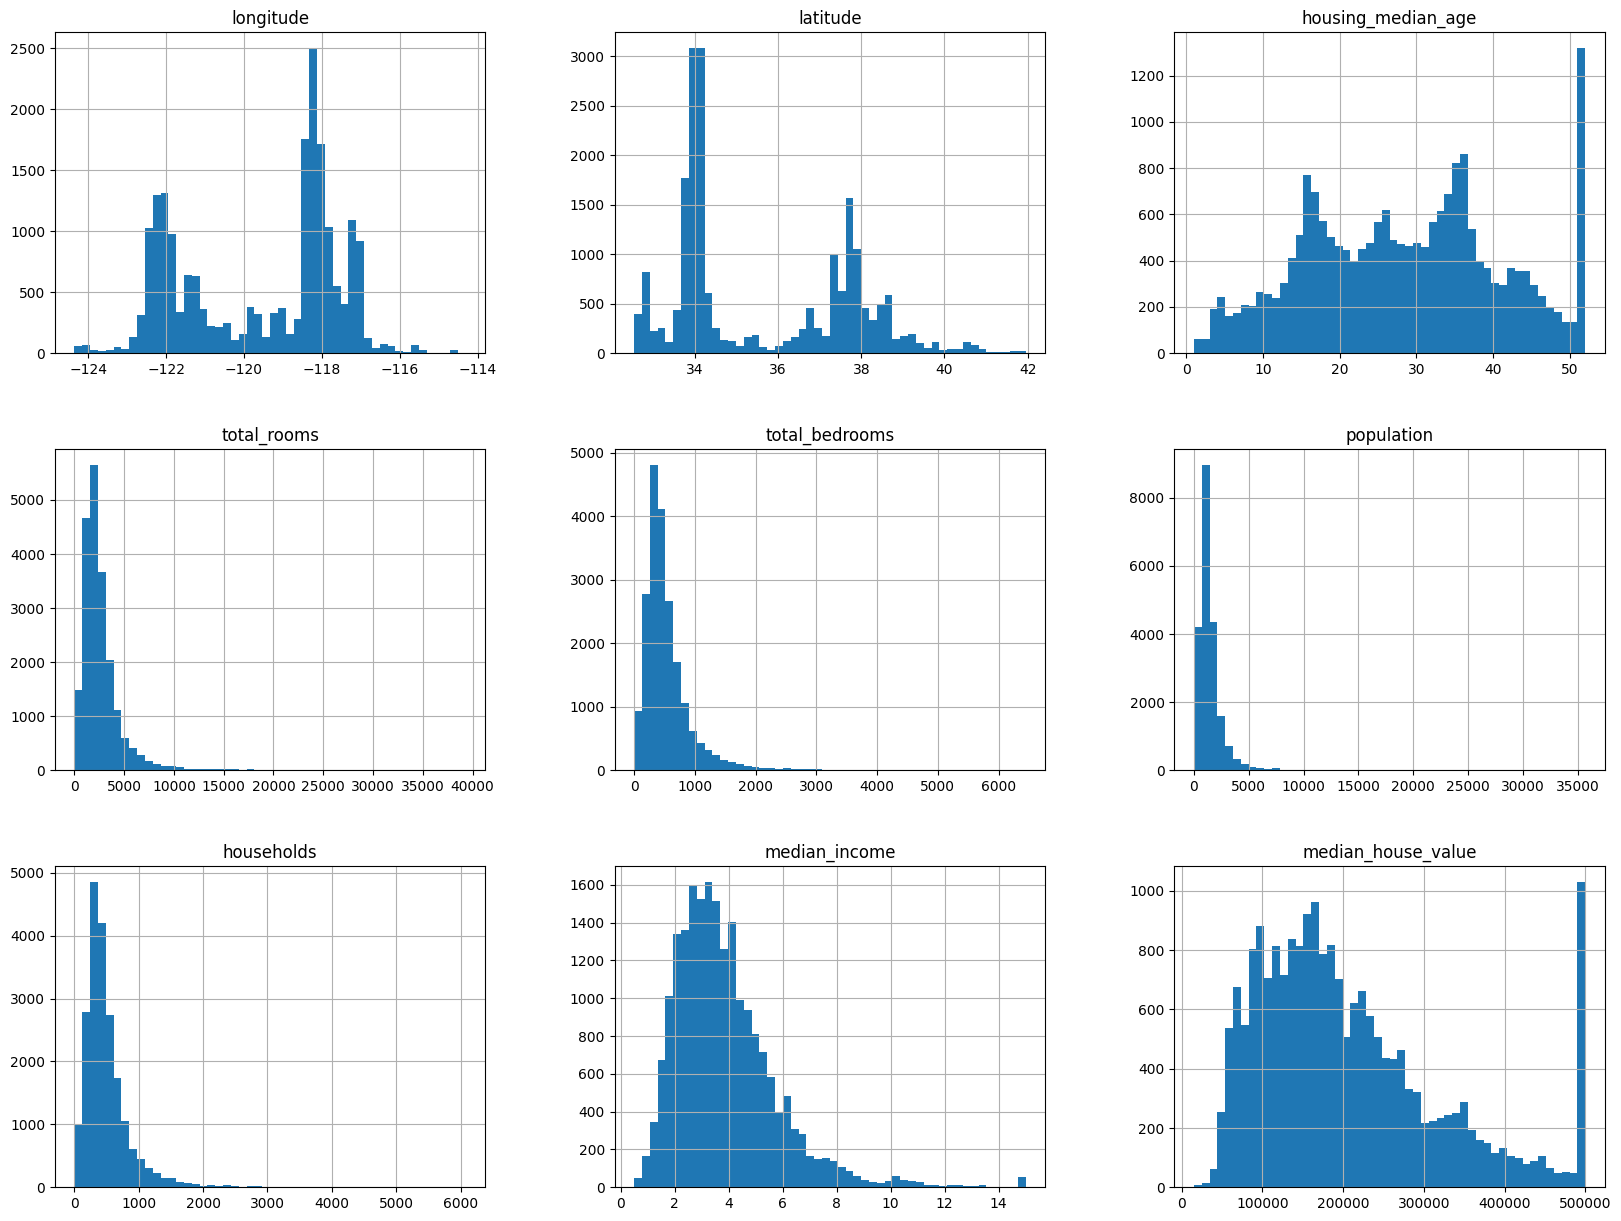

In [12]:
df.hist(bins=50, figsize=(20,15))
# df.hist generuje histogramy - wykresy pokazujace ilosc wartosxi
# bins - okresla liczbe przedzialow- w histogramie
# figsize - ustawia rozmiar rusunku w calach (szerokosc, wysokosc)
plt.savefig("obraz1.png")

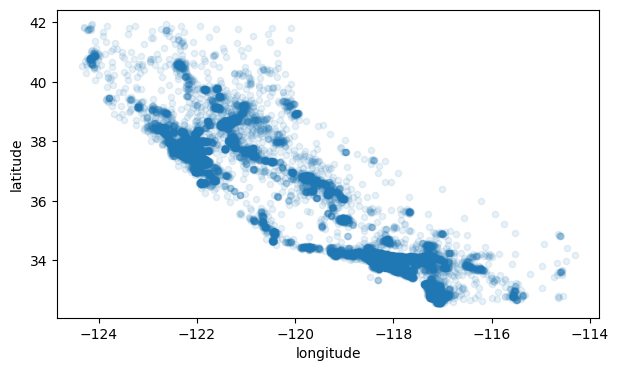

In [13]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(7,4))
# funkcja plot opiera sie na matplotlib(rysownaie wykresow), kind=scatter-punktowy
# alpha - przezroczusyosc punktow 10%
# figsize - wielkosc w calach
plt.savefig("obraz2.png")

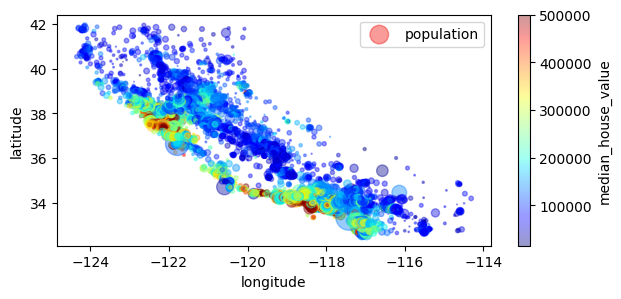

In [14]:

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(7,3),
        colorbar=True, s=df["population"]/100, label = "population",
        c="median_house_value",cmap=plt.get_cmap("jet"))
# colorbar - wyswietla pasek barw obok
# s=df["population"]/100 - ustala rozmiar punktow na wykrsie dzieli przez 100
#     zeby puntky dopasowaly sie odpowiednio do wykresu
# label - ustawia etykeite
# c="median_house_value" - przypisuje kolor puntkow w zaleznosci od wartosci mediany warotsic domu
# cmap=plt.get_cmap("jet") - ustawia kolory wedlug mapy kolorow jet
plt.savefig("obraz3.png")

In [15]:
# pd.get_dummies(df, columns=["ocean_proximity"]).corr()["median_house_value"].sort_values(ascending=False)

In [16]:
pd.get_dummies(df, columns=["ocean_proximity"]).corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"index":"atrybut","median_house_value":"wspolczynnik_korelacji"}).to_csv("korelacja.csv", index=False)
# get_dummies() - kolumna ocean_proximity jest nienumeryczna wicc ta metoda zamienia wartosci na numeryczne
# corr().["median_house_value"] - oblicza macierz korealcji dla wszystkich kolumn,
#   wybieramy median_house_value co poakzuje wspolcznmnik korelacji z ta kolumna
# sort_values(ascending=False) - sortuje m,alejaco
# .reset_index() - przekstalcza ta serie w dataFrame,
#   nazwy atrybutow ktore byly indeksami  sa kolumna
# rename zamienia nazwy kolumn
# to_csv - zapisuje dataframe jako plik csv, index=False mowi ze dodatkowa kolumna indeksu nie zostanie zapisana


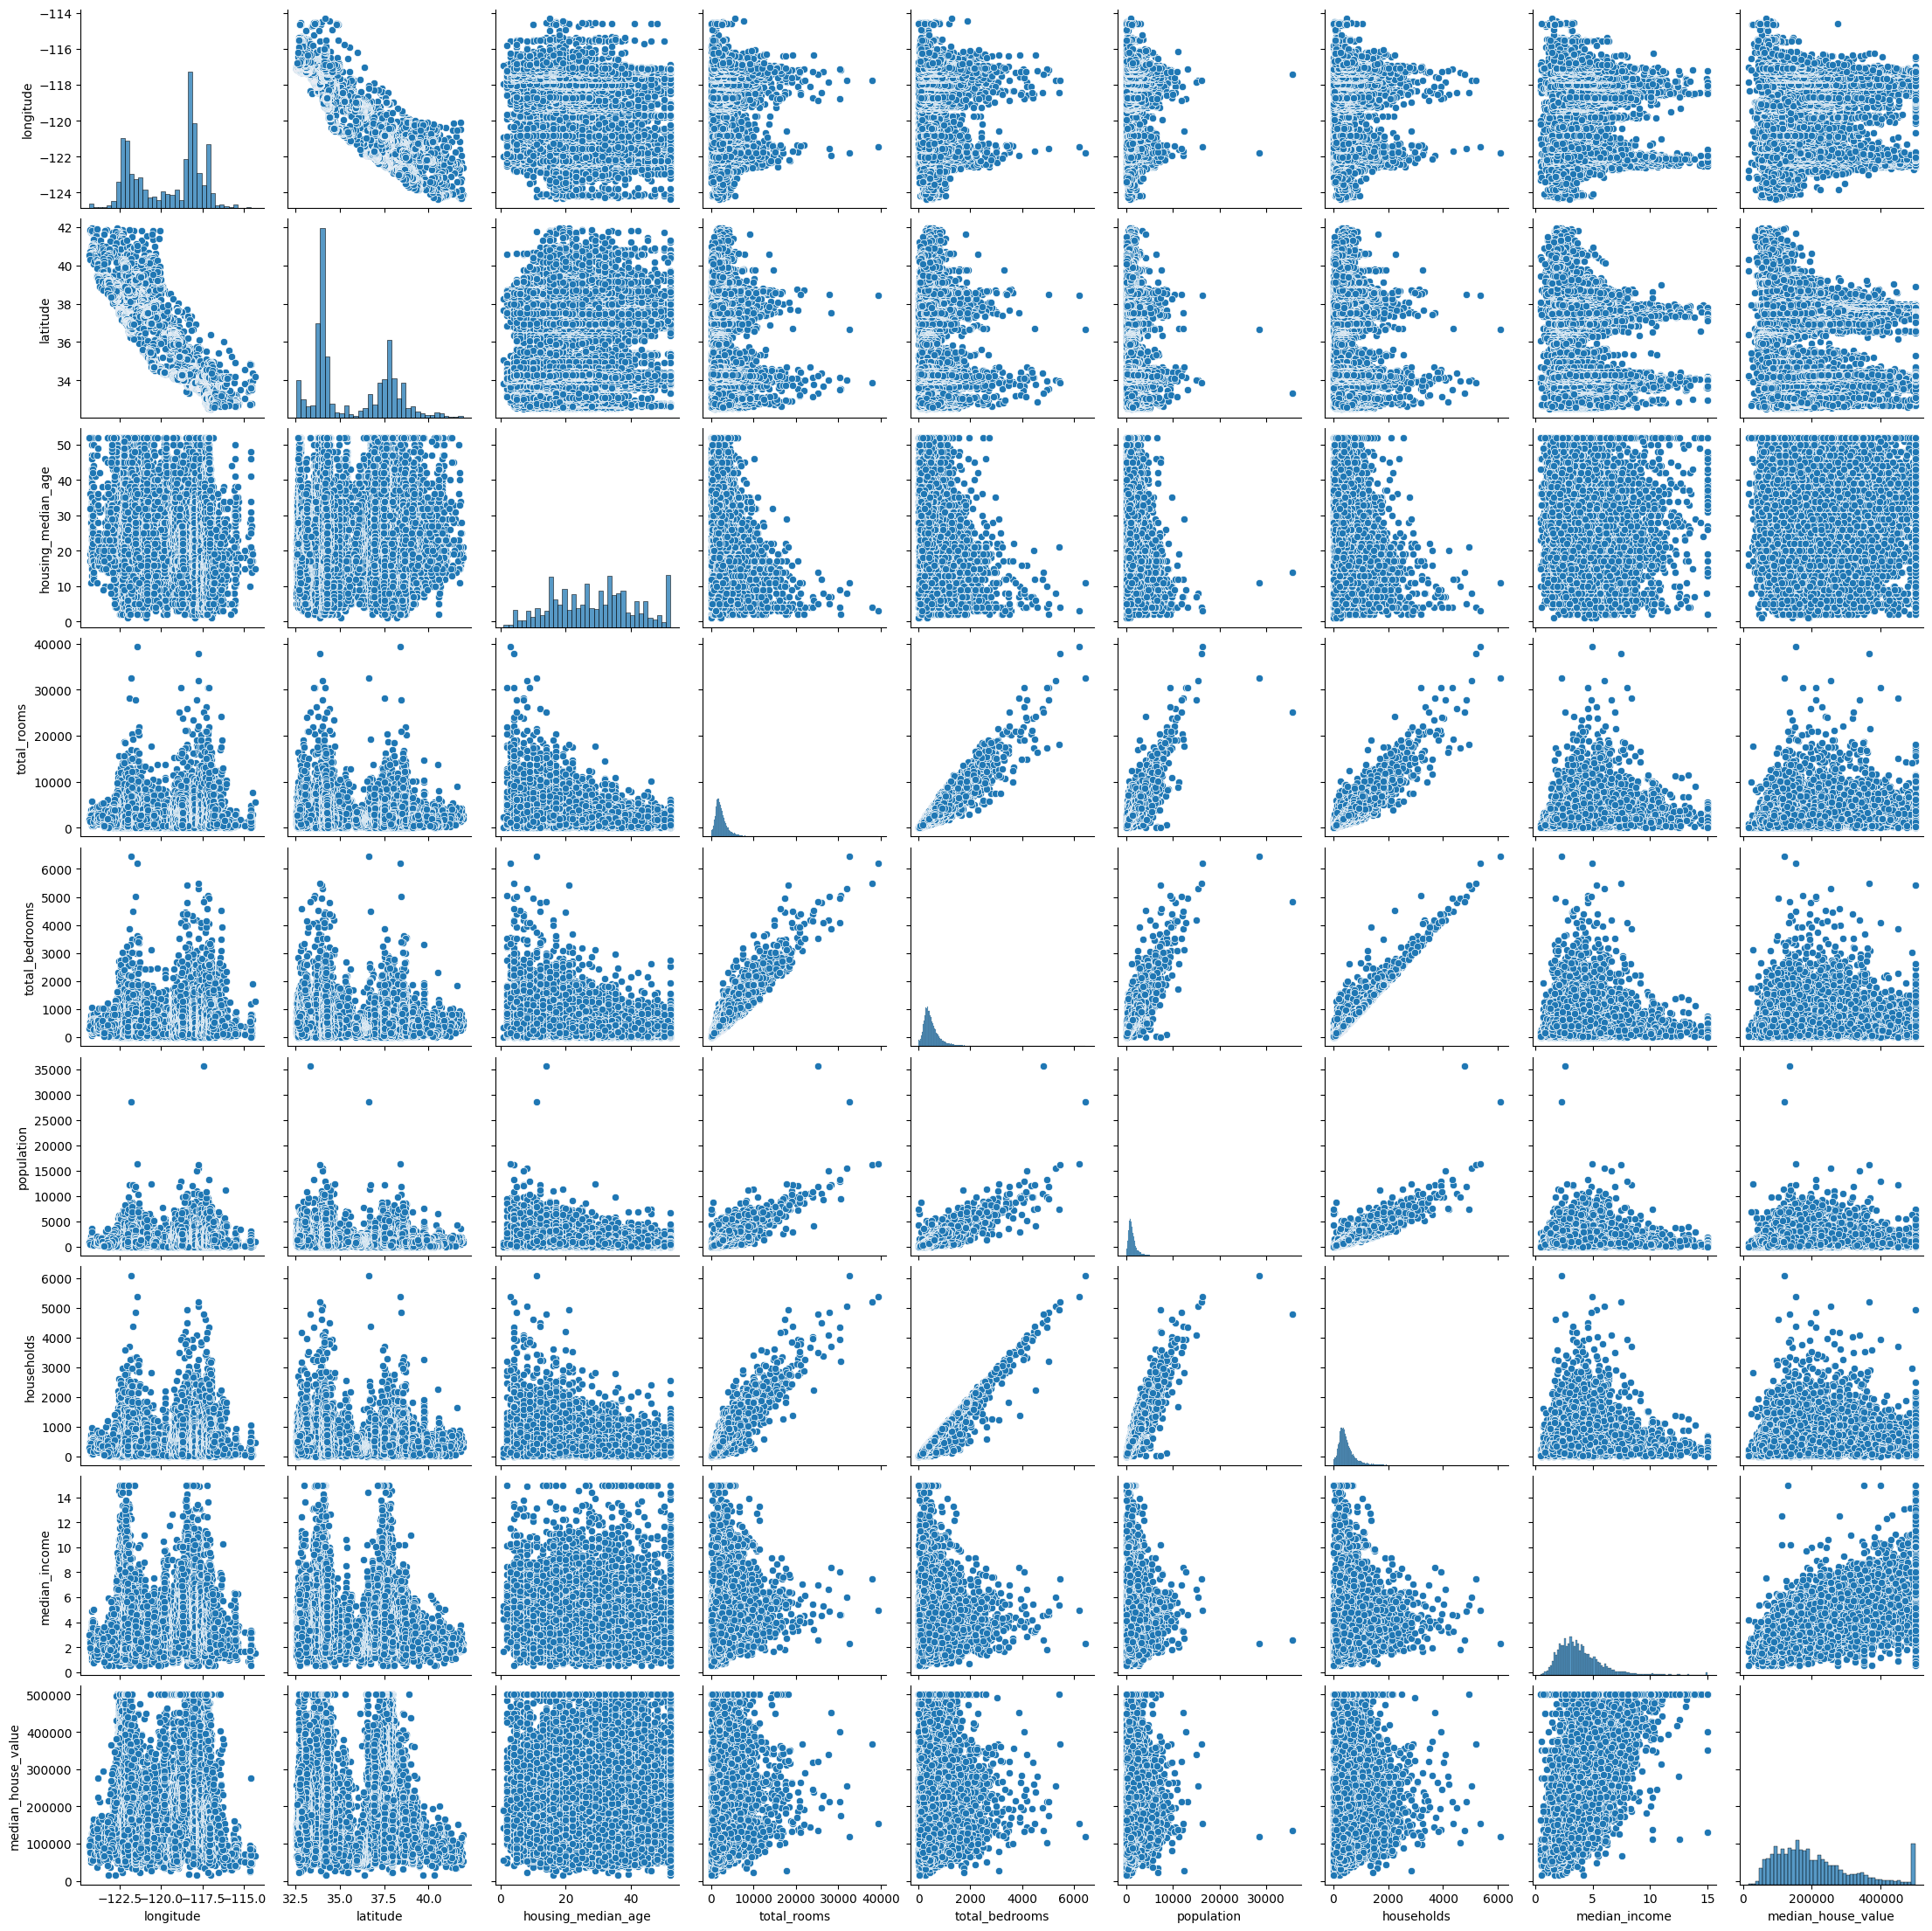

In [17]:
import seaborn as sns
sns.pairplot(df)

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
# ^ podzial zbioru danychb na treningowy i testowy
# test_size=0.2 oznacza ze 20% danycgh to testowe, 80% to treningowe
# random_state ustala ziarno losowosci
len(train_set), len(test_set)

(16512, 4128)

In [19]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND

In [20]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

In [21]:
pd.get_dummies(train_set, columns=["ocean_proximity"]).corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"index":"atrybut","median_house_value":"wspolczynnik_korelacji"})

atrybut  wspolczynnik_korelacji
0           median_house_value                1.000000
1                median_income                0.690647
2    ocean_proximity_<1H OCEAN                0.258544
3     ocean_proximity_NEAR BAY                0.162134
4   ocean_proximity_NEAR OCEAN                0.134263
5                  total_rooms                0.133989
6           housing_median_age                0.103706
7                   households                0.063714
8               total_bedrooms                0.047980
9       ocean_proximity_ISLAND                0.020983
10                  population               -0.026032
11                   longitude               -0.046349
12                    latitude               -0.142983
13      ocean_proximity_INLAND               -0.482862

In [22]:
pd.get_dummies(test_set, columns=["ocean_proximity"]).corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"index":"atrybut","median_house_value":"wspolczynnik_korelacji"})

atrybut  wspolczynnik_korelacji
0           median_house_value                1.000000
1                median_income                0.677502
2    ocean_proximity_<1H OCEAN                0.248648
3   ocean_proximity_NEAR OCEAN                0.172026
4     ocean_proximity_NEAR BAY                0.152416
5                  total_rooms                0.134697
6           housing_median_age                0.113585
7                   households                0.074249
8               total_bedrooms                0.056667
9       ocean_proximity_ISLAND                0.033247
10                  population               -0.019003
11                   longitude               -0.044062
12                    latitude               -0.149295
13      ocean_proximity_INLAND               -0.492888

In [23]:
# wyniki sa podobne ale oczywiscie nie identyczne
train_set.to_pickle("train_set.pkl")
test_set.to_pickle("test_set.pkl")
# pliki pickle to pliki binarne sluzace do serializacji obiekow w pyghtonie